In [1]:
import typing
import json

import numpy
import pandas 

import scipy
import statsmodels
import statsmodels.stats
import statsmodels.stats.descriptivestats

import seaborn

import llm_questionnaires as llmq

In [2]:
MODELS: typing.List[str] = llmq.CONSTANTS.MODELS
MODELS

['llama3.1-8b',
 'llama3.3-70b',
 'mistral-7b',
 'mistral-large-123b',
 'qwen2.5-7b',
 'qwen2.5-72b']

In [ ]:
COLUMNS: typing.List[str] = list(
    pandas.read_csv("../../../data/16pf/survey.csv", delimiter="\t")
    .filter(regex=r'\w\d+', axis=1)
    .columns
)[:-1]
len(COLUMNS)

(162,
 ['A1',
  'A2',
  'A3',
  'A4',
  'A5',
  'A6',
  'A7',
  'A8',
  'A9',
  'A10',
  'B1',
  'B2',
  'B3',
  'B4',
  'B5',
  'B6',
  'B7',
  'B8',
  'B9',
  'B10',
  'B11',
  'B12',
  'B13',
  'C1',
  'C2',
  'C3',
  'C4',
  'C5',
  'C6',
  'C7',
  'C8',
  'C9',
  'C10',
  'D1',
  'D2',
  'D3',
  'D4',
  'D5',
  'D6',
  'D7',
  'D8',
  'D9',
  'D10',
  'E1',
  'E2',
  'E3',
  'E4',
  'E5',
  'E6',
  'E7',
  'E8',
  'E9',
  'E10',
  'F1',
  'F2',
  'F3',
  'F4',
  'F5',
  'F6',
  'F7',
  'F8',
  'F9',
  'F10',
  'G1',
  'G2',
  'G3',
  'G4',
  'G5',
  'G6',
  'G7',
  'G8',
  'G9',
  'G10',
  'H1',
  'H2',
  'H3',
  'H4',
  'H5',
  'H6',
  'H7',
  'H8',
  'H9',
  'H10',
  'I1',
  'I2',
  'I3',
  'I4',
  'I5',
  'I6',
  'I7',
  'I8',
  'I9',
  'I10',
  'J1',
  'J2',
  'J3',
  'J4',
  'J5',
  'J6',
  'J7',
  'J8',
  'J9',
  'J10',
  'K1',
  'K2',
  'K3',
  'K4',
  'K5',
  'K6',
  'K7',
  'K8',
  'K9',
  'K10',
  'L1',
  'L2',
  'L3',
  'L4',
  'L5',
  'L6',
  'L7',
  'L8',
  'L9',
  'L

In [41]:
raw: typing.Dict[str, pandas.DataFrame]= {
    **llmq.evaluation.read_populations("data/base", MODELS, COLUMNS),
    "human_full": (
        pandas.read_csv("../../../data/16pf/survey.csv", delimiter="\t")
        .rename_axis(index="participant")
        .filter(regex=r'\w\d+', axis=1)
        .replace(-1, None)
        .apply(pandas.to_numeric)
        .iloc[:, :-1]
        .set_axis(COLUMNS, axis=1)
    ),
    "random": (
        pandas.DataFrame(numpy.random.randint(0,5, (1000, len(COLUMNS))), columns=COLUMNS)
        .rename_axis(index="participant")
    )
}

raw.keys()

dict_keys(['llama3.1-8b', 'llama3.3-70b', 'mistral-7b', 'mistral-large-123b', 'qwen2.5-7b', 'qwen2.5-72b', 'human_full', 'random'])

In [43]:
raw["llama3.1-8b"]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,O10,P1,P2,P3,P4,P5,P6,P7,P8,P9
participant,,,,,,,,,,,,,,,,,,,,,
0,4.0,5.0,3.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,...,2.0,1.0,4.0,2.0,3.0,2.0,4.0,2.0,4.0,4.0
1,5.0,4.0,NaN,4.0,4.0,4.0,4.0,2.0,3.0,4.0,...,2.0,3.0,3.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0
2,5.0,4.0,4.0,3.0,5.0,4.0,4.0,4.0,3.0,2.0,...,2.0,2.0,3.0,2.0,3.0,2.0,2.0,1.0,4.0,3.0
3,3.0,4.0,3.0,3.0,5.0,5.0,5.0,5.0,2.0,4.0,...,4.0,2.0,2.0,2.0,5.0,2.0,4.0,1.0,4.0,5.0
4,3.0,4.0,3.0,4.0,5.0,4.0,5.0,2.0,2.0,2.0,...,2.0,3.0,2.0,2.0,2.0,3.0,1.0,1.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,4.0,3.0,3.0,4.0,5.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,4.0,2.0,5.0,2.0,2.0,4.0
996,3.0,4.0,3.0,1.0,4.0,4.0,4.0,4.0,2.0,2.0,...,2.0,2.0,3.0,2.0,4.0,2.0,2.0,1.0,4.0,4.0
997,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,...,2.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,3.0,4.0


In [44]:
for key, values in raw.items():
    values.to_csv(f"reports/raw.{key}.csv", index=False)

In [45]:
descriptive = pandas.concat({
    key: statsmodels.stats.descriptivestats.describe(values).T
    for key, values in raw.items()
})
descriptive

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/home/ubun

nobs  missing      mean   std_err  upper_ci  lower_ci  \
llama3.1-8b A1  1000.0      9.0  3.972755  0.022984  4.017802  3.927707   
            A2  1000.0      5.0  4.062312  0.008177  4.078339  4.046284   
            A3  1000.0      7.0  3.247734  0.022190  3.291227  3.204242   
            A4  1000.0      8.0  3.745968  0.022999  3.791044  3.700891   
            A5  1000.0      3.0  4.304915  0.015589  4.335468  4.274362   
...                ...      ...       ...       ...       ...       ...   
random      P5  1000.0      0.0  1.987000  0.045043  2.075282  1.898718   
            P6  1000.0      0.0  1.971000  0.044768  2.058743  1.883257   
            P7  1000.0      0.0  1.944000  0.044977  2.032152  1.855848   
            P8  1000.0      0.0  1.957000  0.044442  2.044105  1.869895   
            P9  1000.0      0.0  2.018000  0.044403  2.105029  1.930971   

                     std  iqr  iqr_normal       mad  ...  median   1%   5%  \
llama3.1-8b A1  0.723533  0.0    0.000000  0.507160  ...     4.0  3.0  3.0   
            A2  0.257946  0.0    0.000000  0.124397  ...     4.0  4.0  4.0   
            A3  0.699263  0.0    0.000000  0.504583  ...     3.0  1.0  2.6   
            A4  0.724366  1.0    0.741301  0.559549  ...     4.0  1.0  3.0   
            A5  0.492214  1.0    0.741301  0.440616  ...     4.0  4.0  4.0   
...                  ...  ...         ...       ...  ...     ...  ...  ...   
random      P5  1.424381  2.0    1.482602  1.211548  ...     2.0  0.0  0.0   
            P6  1.415685  2.0    1.482602  1.221814  ...     2.0  0.0  0.0   
            P7  1.422282  2.0    1.482602  1.225728  ...     2.0  0.0  0.0   
            P8  1.405392  2.0    1.482602  1.185686  ...     2.0  0.0  0.0   
            P9  1.404154  2.0    1.482602  1.187708  ...     2.0  0.0  0.0   

                10%  25%  50%  75%  90%  95%  99%  
llama3.1-8b A1  3.0  4.0  4.0  4.0  5.0  5.0  5.0  
            A2  4.0  4.0  4.0  4.0  4.0  5.0  5.0  
            A3  3.0  3.0  3.0  3.0  4.0  5.0  5.0  
            A4  3.0  3.0  4.0  4.0  5.0  5.0  5.0  
            A5  4.0  4.0  4.0  5.0  5.0  5.0  5.0  
...             ...  ...  ...  ...  ...  ...  ...  
random      P5  0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            P6  0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            P7  0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            P8  0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            P9  0.0  1.0  2.0  3.0  4.0  4.0  4.0  

[1296 rows x 31 columns]

In [46]:
raw["human_sampled"] = (
    pandas.DataFrame(numpy.stack([
        numpy.random.normal(row["mean"], row["std"], 1000).astype(int)
        for _, row in descriptive.loc["human_full"][["mean", "std"]].iterrows()
    ], axis=1), columns=range(1,len(COLUMNS) + 1))
    .rename_axis(index="participant")
)

In [47]:
pandas.concat({
    (key_1, key_2): (
        pandas.Series(
            scipy
            .stats.f_oneway(
                values_1,
                values_2,
                nan_policy="omit"
            )
            .pvalue
            > 0.05,
            name="f_oneway_significant"
        )
        .value_counts()
    )
    for key_1, values_1 in raw.items()
    for key_2, values_2 in raw.items()
}).to_frame()

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:618: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:634: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  return result_to_tuple(hypotest_fun_out(*samples, **kwds), n_out)


count
                            f_oneway_significant       
llama3.1-8b   llama3.1-8b   True                    113
                            False                    49
              llama3.3-70b  False                   160
                            True                      2
              mistral-7b    False                   148
...                                                 ...
human_sampled qwen2.5-72b   True                     12
              human_full    False                   162
              random        False                   151
                            True                     11
              human_sampled True                    162

[155 rows x 1 columns]

In [48]:
sim = (
    llmq.evaluation.apply_calc_similarity(raw)
    .to_frame()
    .reset_index(level=[0, 1])
    .pivot_table(values="similarity", index="level_0", columns="level_1")
    .reindex(
        columns=(idx := ["random", "human_sampled", "human_full", *MODELS]),
        index=idx
    )
    .pipe(llmq.evaluation.extract_triu_df)
)
sim

print(sim.pipe(llmq.evaluation.format_latex_df))

\begin{tabular}{lrrrrrrrrr}
\toprule
level_1 & \rotatebox{65}{random} & \rotatebox{65}{human\_sampled} & \rotatebox{65}{human\_full} & \rotatebox{65}{llama3.1-8b} & \rotatebox{65}{llama3.3-70b} & \rotatebox{65}{mistral-7b} & \rotatebox{65}{mistral-large-123b} & \rotatebox{65}{qwen2.5-7b} & \rotatebox{65}{qwen2.5-72b} \\
level_0 &  &  &  &  &  &  &  &  &  \\
\midrule
random &  &  &  &  &  &  &  &  &  \\
human\_sampled & 0.001 &  &  &  &  &  &  &  &  \\
human\_full & -0.001 & -0.014 &  &  &  &  &  &  &  \\
llama3.1-8b & -0.014 & -0.002 & -0.004 &  &  &  &  &  &  \\
llama3.3-70b & 0.001 & 0.009 & 0.006 & -0.018 &  &  &  &  &  \\
mistral-7b & -0.001 & -0.012 & 0.007 & -0.018 & -0.004 &  &  &  &  \\
mistral-large-123b & 0.004 & 0.003 & 0.004 & 0.014 & 0.005 & -0.012 &  &  &  \\
qwen2.5-7b & 0.000 & 0.002 & 0.004 & -0.002 & -0.008 & 0.001 & 0.006 &  &  \\
qwen2.5-72b & -0.005 & 0.011 & 0.012 & 0.010 & 0.011 & -0.004 & -0.006 & 0.003 &  \\
\bottomrule
\end{tabular}



<Axes: xlabel='level_1', ylabel='level_0'>

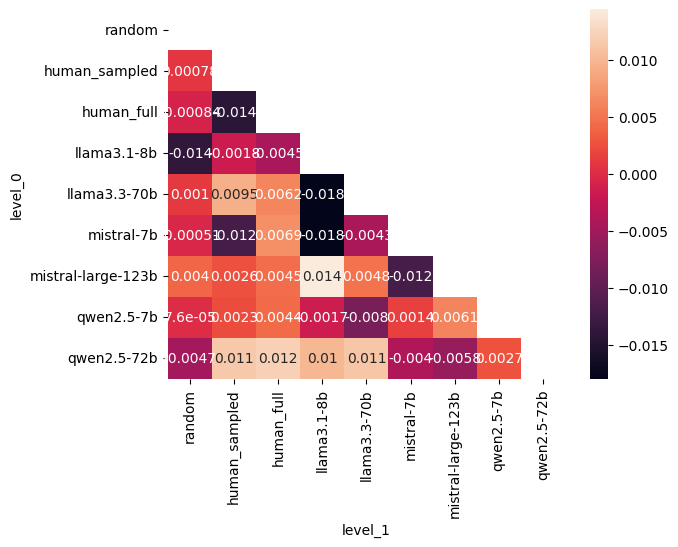

In [49]:
seaborn.heatmap(sim, annot=True, mask=numpy.triu(sim))

In [ ]:
human_chunked = {
    f"{n:02d}": chunk
    for n, chunk in enumerate(numpy.array_split(raw["human_full"].sample(frac=1.0), 10), start=1)
}

sim = (
    llmq.evaluation.apply_calc_similarity(human_chunked)
    .to_frame()
    .reset_index(level=[0,1])
    .pivot_table(values="similarity", index="level_0", columns="level_1")
    .pipe(llmq.evaluation.extract_triu_df)
)
sim

print(sim.pipe(llmq.evaluation.format_latex_df))

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
